In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv("C:/Users/Sahu/Documents/Unified Mentor/supplychain_data.csv")

In [9]:
data.head(5)

,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [11]:
data.tail()

,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864
99,haircare,SKU99,68.517833,17,627,9185.185829,Unknown,55,8,59,...,Chennai,29,921,2,38.072899,Fail,0.346027,Rail,Route B,210.743009


## Data Preparation and cleaning

1. Load the file using pandas
2. Look at some infromation about the data & the columns
3. Fix any missing or incorrect values

In [15]:
data.columns

Index(['Product_type', 'SKU', 'Price', 'Availability',
       'Number_of_products_sold', 'Revenue_generated', 'Customer_demographics',
       'Stock_levels', 'Lead_times', 'Order_quantities', 'Shipping_times',
       'Shipping_carriers', 'Shipping_costs', 'Supplier _name', 'Location',
       'Lead_time', 'Production_volumes', 'Manufacturing_lead_time',
       'Manufacturing_costs', 'Inspection_results', 'Defect_rates',
       'Transportation_modes', 'Routes', 'Costs'],
      dtype='object')

In [17]:
data.shape

(100, 24)

In [19]:
data.describe()

,Price,Availability,Number_of_products_sold,Revenue_generated,Stock_levels,Lead_times,Order_quantities,Shipping_times,Shipping_costs,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Defect_rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239830,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976920,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product_type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number_of_products_sold  100 non-null    int64  
 5   Revenue_generated        100 non-null    float64
 6   Customer_demographics    100 non-null    object 
 7   Stock_levels             100 non-null    int64  
 8   Lead_times               100 non-null    int64  
 9   Order_quantities         100 non-null    int64  
 10  Shipping_times           100 non-null    int64  
 11  Shipping_carriers        100 non-null    object 
 12  Shipping_costs           100 non-null    float64
 13  Supplier _name           100 non-null    object 
 14  Location                 10

## Checking Missing and Duplicate values

In [24]:
data.isnull().sum()

Product_type               0
SKU                        0
Price                      0
Availability               0
Number_of_products_sold    0
Revenue_generated          0
Customer_demographics      0
Stock_levels               0
Lead_times                 0
Order_quantities           0
Shipping_times             0
Shipping_carriers          0
Shipping_costs             0
Supplier _name             0
Location                   0
Lead_time                  0
Production_volumes         0
Manufacturing_lead_time    0
Manufacturing_costs        0
Inspection_results         0
Defect_rates               0
Transportation_modes       0
Routes                     0
Costs                      0
dtype: int64

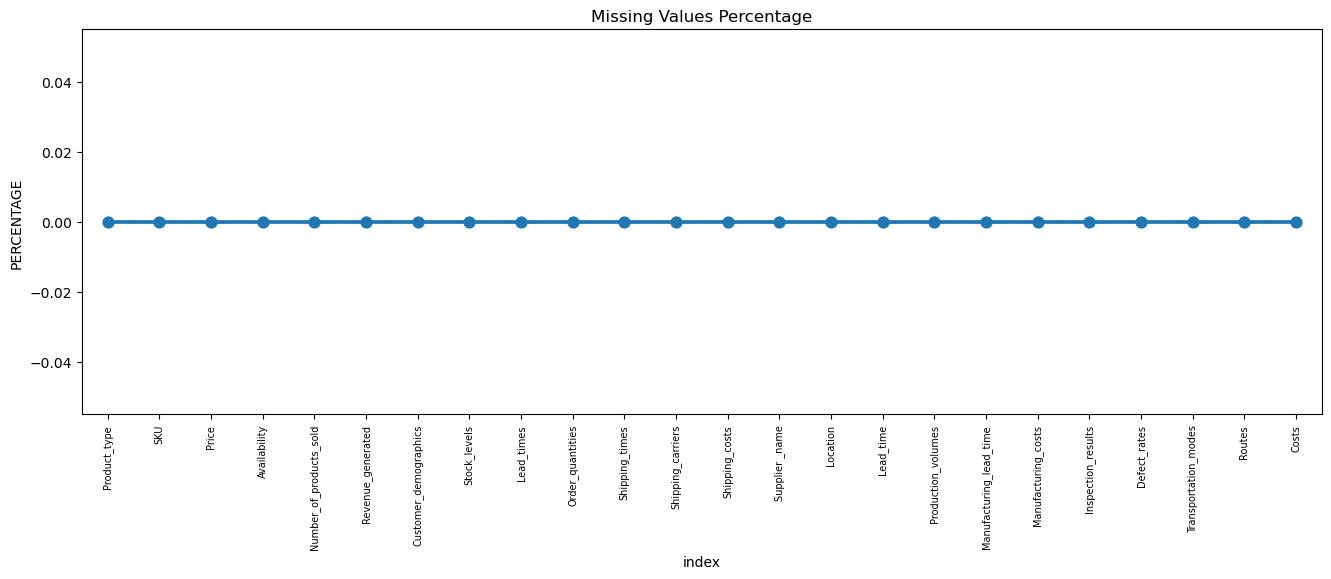

In [26]:
plt.figure(figsize=(16, 5))
missing_values = pd.DataFrame(data.isnull().sum() * 100 / data.shape[0]).reset_index()
missing_values.columns = ['index', 'percentage']  # Renaming columns for clarity
ax = sns.pointplot(x='index', y='percentage', data=missing_values)  # Use x and y parameter names
plt.xticks(rotation=90, fontsize=7)
plt.title('Missing Values Percentage')
plt.ylabel("PERCENTAGE")
plt.show()


In [28]:
#Checking Duplicate Values
len(data[data.duplicated()])

0

In [30]:
#unique values for each column
data.nunique()

Product_type                 3
SKU                        100
Price                      100
Availability                63
Number_of_products_sold     96
Revenue_generated          100
Customer_demographics        4
Stock_levels                65
Lead_times                  29
Order_quantities            61
Shipping_times              10
Shipping_carriers            3
Shipping_costs             100
Supplier _name               5
Location                     5
Lead_time                   29
Production_volumes          96
Manufacturing_lead_time     30
Manufacturing_costs        100
Inspection_results           3
Defect_rates               100
Transportation_modes         4
Routes                       3
Costs                      100
dtype: int64

## Data Visualisation

### Sales Analysis
1. Analyze number of products sold and revenue generated to understand sales performance over time.
2. Identify customer demographics to determine which groups are purchasing the most products.
3. Track availability and stock levels to ensure the right products are in stock when customers are ready to buy.

In [34]:
# Correcting the column names
product_sold = data.groupby(['Product_type'])[['Number_of_products_sold', 'Revenue_generated']].sum().reset_index()

# Rounding 'Revenue_generated' to 2 decimal places
data['Revenue_generated'] = data['Revenue_generated'].round(2)

In [36]:
product_sold

,Product_type,Number_of_products_sold,Revenue_generated
0,cosmetics,11757,161521.266001
1,haircare,13611,174455.390606
2,skincare,20731,241628.162133


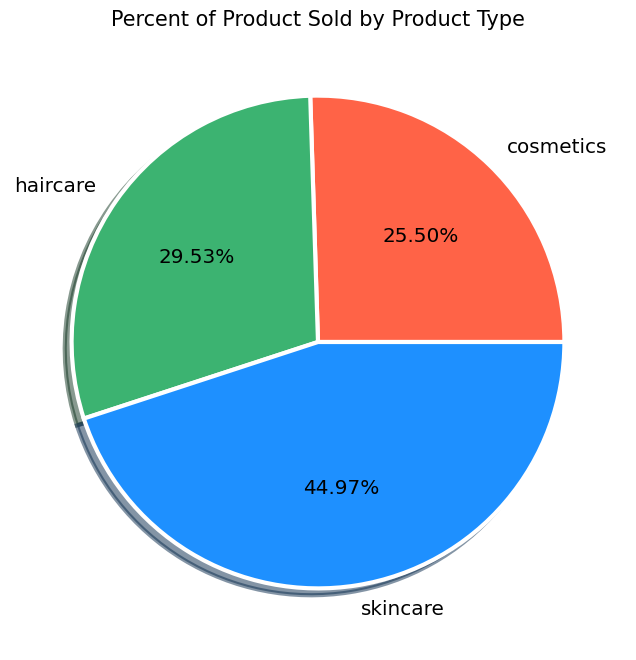

In [38]:
plt.figure(figsize=(12, 8))
colors = ['#FF6347', '#3CB371', '#1E90FF']  # Tomato, MediumSeaGreen, DodgerBlue

pie_chart = plt.pie(
    product_sold['Number_of_products_sold'],
    labels=product_sold['Product_type'],
    autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    shadow=True,
    colors=colors
)

plt.title('Percent of Product Sold by Product Type', fontsize=15)
plt.show()


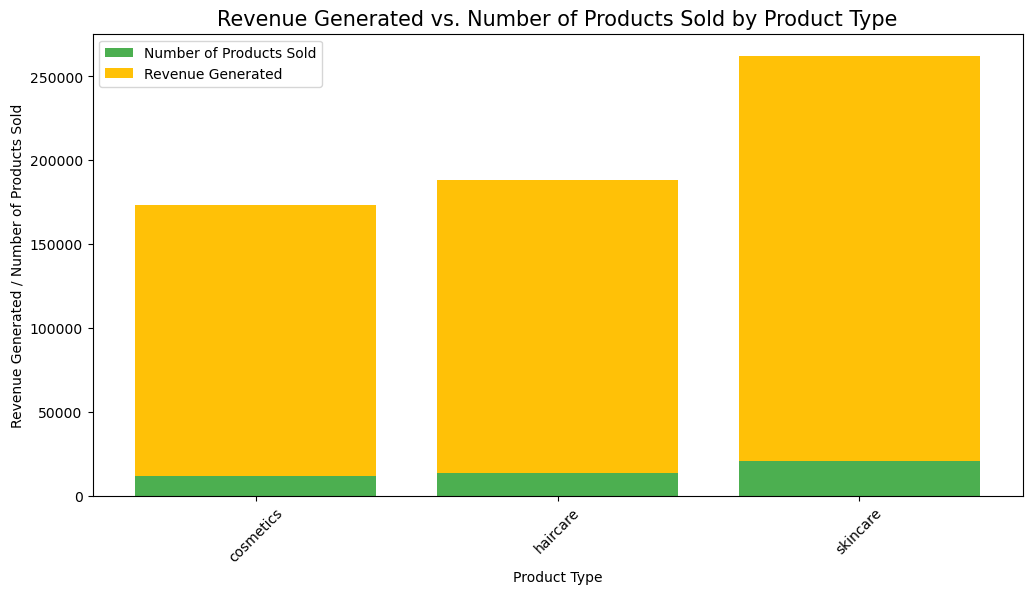

In [40]:
plt.figure(figsize=(12, 6))

# New colors for the bars
plt.bar(x=product_sold['Product_type'], 
        height=product_sold["Number_of_products_sold"], 
        color='#4CAF50',  # Green
        label='Number of Products Sold')

plt.bar(x=product_sold['Product_type'], 
        height=product_sold["Revenue_generated"], 
        bottom=product_sold["Number_of_products_sold"], 
        color='#FFC107',  # Amber
        label='Revenue Generated')

plt.title("Revenue Generated vs. Number of Products Sold by Product Type", fontsize=15)
plt.xlabel("Product Type")
plt.ylabel("Revenue Generated / Number of Products Sold")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Add a legend to differentiate between the bars
plt.show()


##### So, the highest number of products sold of the three product categories is skincare, which means 45% of business comes from skincare, 29% from haircare, and 25% from cosmetics.

##### And most of the revenue comes from skincare products, followed by haircare, and then cosmetics products.

In [43]:
data['Customer_demographics'].unique()

array(['Non-binary', 'Female', 'Unknown', 'Male'], dtype=object)

In [45]:
# Step 1: Check the column names to ensure correctness
print(data.columns)

# Step 2: Group by with correct column names
demographics = data.groupby(['Customer_demographics', 'Product_type'])['Number_of_products_sold'].sum().reset_index()


Index(['Product_type', 'SKU', 'Price', 'Availability',
       'Number_of_products_sold', 'Revenue_generated', 'Customer_demographics',
       'Stock_levels', 'Lead_times', 'Order_quantities', 'Shipping_times',
       'Shipping_carriers', 'Shipping_costs', 'Supplier _name', 'Location',
       'Lead_time', 'Production_volumes', 'Manufacturing_lead_time',
       'Manufacturing_costs', 'Inspection_results', 'Defect_rates',
       'Transportation_modes', 'Routes', 'Costs'],
      dtype='object')


In [47]:
demographics

,Customer_demographics,Product_type,Number_of_products_sold
0,Female,cosmetics,4012
1,Female,haircare,936
2,Female,skincare,7853
3,Male,cosmetics,2304
4,Male,haircare,2292
5,Male,skincare,2911
6,Non-binary,cosmetics,2607
7,Non-binary,haircare,2820
8,Non-binary,skincare,5153
9,Unknown,cosmetics,2834


Index(['Customer_demographics', 'Product_type', 'Number_of_products_sold'], dtype='object')


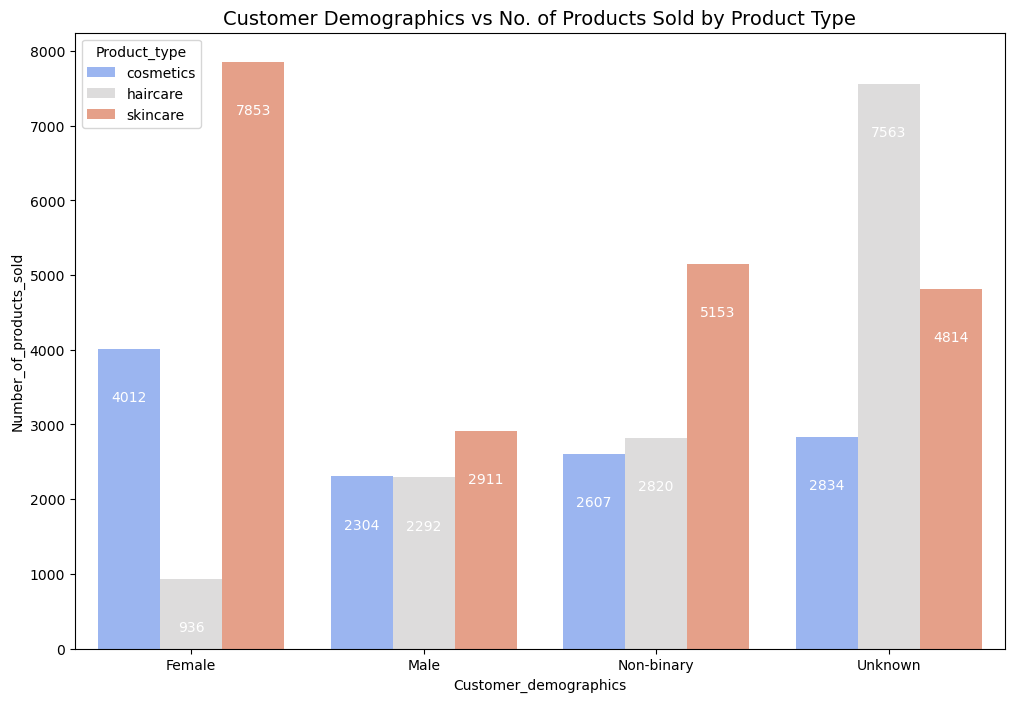

In [49]:
# Step 1: Check the column names of the demographics DataFrame
print(demographics.columns)

# Step 2: Update the plot code with a new color palette
plt.figure(figsize=(12, 8))

# Use a different color palette, e.g., 'coolwarm'
p = sns.barplot(x=demographics['Customer_demographics'], 
                y=demographics['Number_of_products_sold'], 
                hue=demographics['Product_type'], 
                palette='coolwarm')  # Changed to 'coolwarm'

for container in p.containers:
    p.bar_label(container, padding=-40, color='white', fontsize=10)

plt.title("Customer Demographics vs No. of Products Sold by Product Type", fontsize=14)
plt.show()


##### According to the graph, the female group purchases higher-quality skincare and cosmetic products, whereas the male group purchases products of about equal quality in terms of haircare and cosmetics. And an unknown group category purchases a higher quantity of all three products.

##### Skin care products are the most popular among all four product categories. Skincare products have a higher demand.

In [52]:
stock = data.groupby(['Product_type'])[['Stock_levels', 'Availability']].sum().reset_index()


In [54]:
stock

,Product_type,Stock_levels,Availability
0,cosmetics,1525,1332
1,haircare,1644,1471
2,skincare,1608,2037


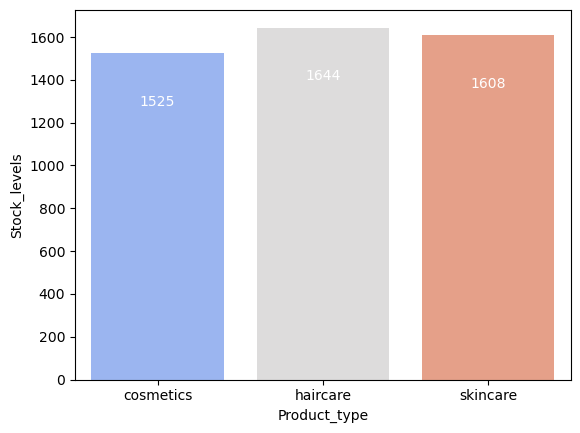

In [56]:
# Using a different built-in color palette, e.g., 'coolwarm'
p = sns.barplot(x='Product_type', y='Stock_levels', data=stock, palette='coolwarm')  # Changed to 'coolwarm'

for container in p.containers:
    p.bar_label(container, padding=-40, color='white', fontsize=10)

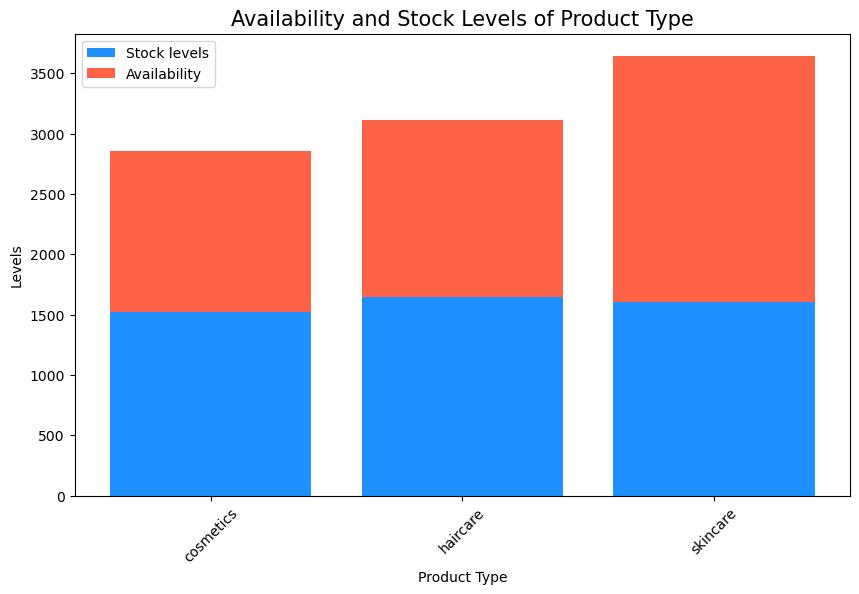

In [58]:
plt.figure(figsize=(10, 6))

# Plotting Stock levels with a new color
plt.bar(x=stock['Product_type'], 
        height=stock['Stock_levels'], 
        color='#1E90FF',  # DodgerBlue
        label='Stock levels')

# Plotting Availability on top of Stock levels with a new color
plt.bar(x=stock['Product_type'], 
        height=stock['Availability'], 
        bottom=stock['Stock_levels'], 
        color='#FF6347',  # Tomato
        label='Availability')

plt.title("Availability and Stock Levels of Product Type", fontsize=15)
plt.xlabel("Product Type")
plt.ylabel("Levels")
plt.legend()  # To show the labels for 'Stock levels' and 'Availability'
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [60]:
data.groupby(['Product_type'])[['Stock_levels', 'Availability']].sum().reset_index()


,Product_type,Stock_levels,Availability
0,cosmetics,1525,1332
1,haircare,1644,1471
2,skincare,1608,2037


##### In the graph, green represents the availability and brown represents the stock levels.

##### So according to the graph, the company holds an equal quantity of inventory of haircare and skincare products and a bit less stock of cosmetic product.

##### So, skincare products had a higher availability and lower stock level, which means we can quickly manufacture and ship products  as needed. On the other hand, cosmetics and haircare have a higher stock level and lower availability, which means the company cannot quickly ship product to the customer because,It took time to manufacture the product.

## Operations Analysis:

1. Analyze lead times, order quantities, and production volumes to optimize inventory management and reduce stockouts.
2. Track manufacturing lead time and costs to identify areas for improvement and cost savings.
3. Monitor inspection results and defect rates to identify quality issues and improve manufacturing processes.

In [64]:
data.columns

Index(['Product_type', 'SKU', 'Price', 'Availability',
       'Number_of_products_sold', 'Revenue_generated', 'Customer_demographics',
       'Stock_levels', 'Lead_times', 'Order_quantities', 'Shipping_times',
       'Shipping_carriers', 'Shipping_costs', 'Supplier _name', 'Location',
       'Lead_time', 'Production_volumes', 'Manufacturing_lead_time',
       'Manufacturing_costs', 'Inspection_results', 'Defect_rates',
       'Transportation_modes', 'Routes', 'Costs'],
      dtype='object')

In [66]:
# Correcting the column names and using double brackets for multi-column selection
product = data.groupby(['Product_type'])[['Lead_time', 'Order_quantities', 'Production_volumes']].mean().reset_index()

# Rounding the required columns
product['Order_quantities'] = product['Order_quantities'].round(2)
product['Lead_time'] = product['Lead_time'].round(2)
product['Production_volumes'] = product['Production_volumes'].round(2)


In [68]:
product

,Product_type,Lead_time,Order_quantities,Production_volumes
0,cosmetics,13.54,51.65,479.27
1,haircare,18.71,43.53,586.97
2,skincare,18.00,52.48,609.15


##### Skincare products have higher order quantities and a longer lead time. Furthermore, it has a higher production volume (production volume means the amount of products that are produced by the company), which means higher production volumes may require longer lead times to ensure that there is enough time to manufacture the products and meet customer demand.

##### Haircare products have a longer lead time and higher production volumes. This may be because haircare products require more specialised ingredients or manufacturing processes.

In [71]:
avg_costs = data.groupby(['Manufacturing_lead_time'])['Manufacturing_costs'].mean().reset_index().sort_values(by='Manufacturing_costs')
avg_costs['Manufacturing_costs'] = avg_costs['Manufacturing_costs'].round(2)


In [73]:
avg_costs

,Manufacturing_lead_time,Manufacturing_costs
26,27,19.93
27,28,27.28
3,4,27.40
19,20,27.67
5,6,27.80
13,14,29.08
25,26,31.68
21,22,33.81
14,15,34.34
9,10,39.83


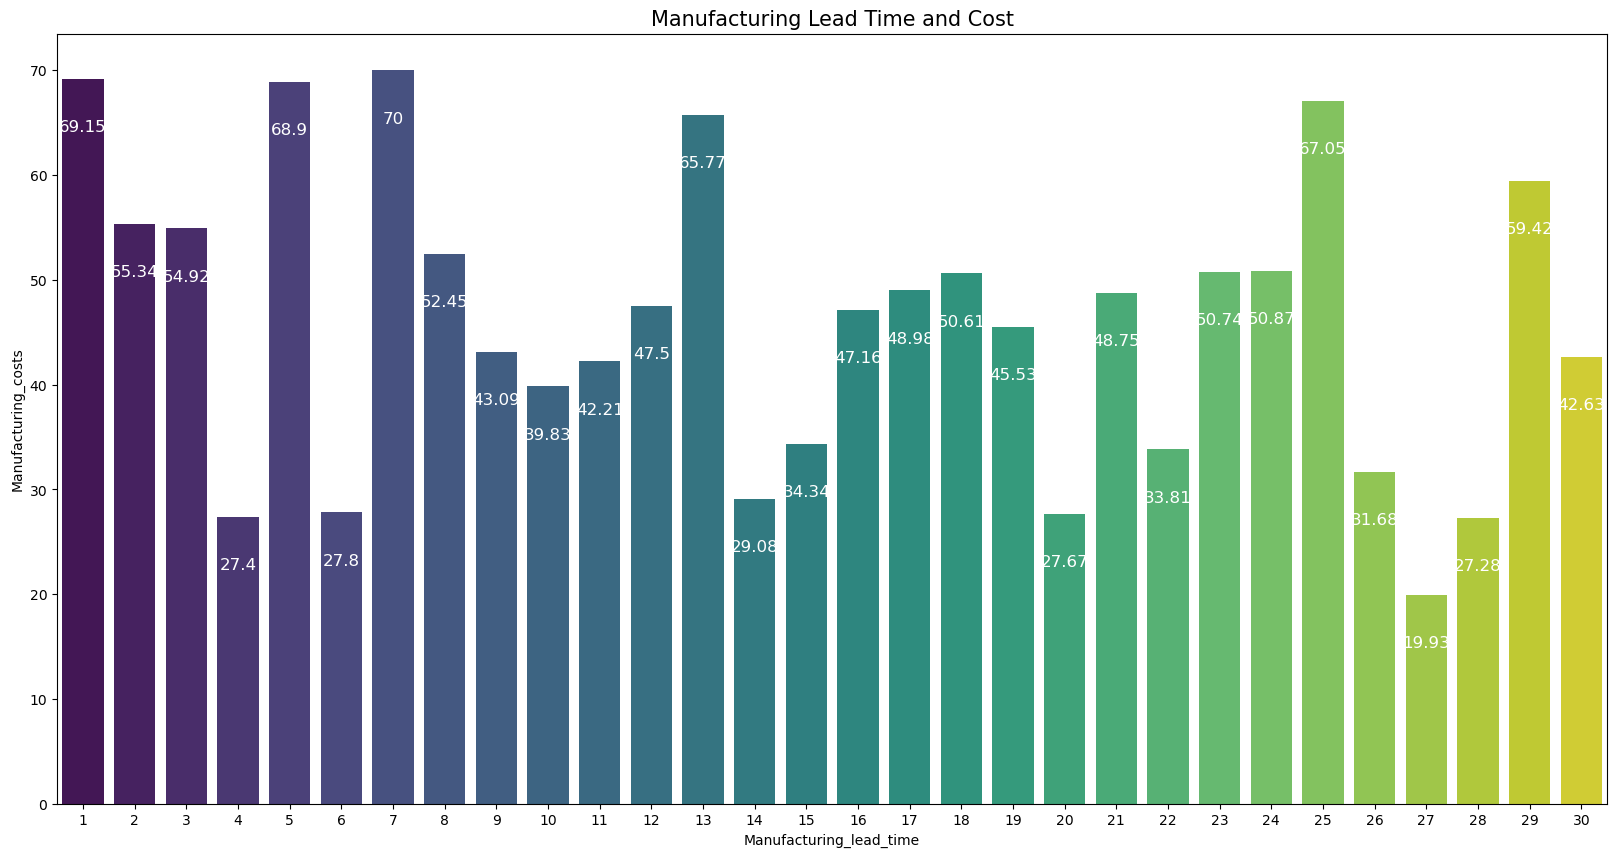

In [75]:
plt.figure(figsize=(20, 10))

# Use a different built-in palette, such as 'viridis'
p = sns.barplot(x=avg_costs['Manufacturing_lead_time'], 
                y=avg_costs['Manufacturing_costs'], 
                palette='viridis')  # Changed to 'viridis'

for container in p.containers:
    p.bar_label(container, padding=-40, color='white', fontsize=12)
    
plt.title('Manufacturing Lead Time and Cost', fontsize=15)
plt.show()


In [77]:
rate = data.groupby(['Product_type', 'Inspection_results'])['Defect_rates'].mean().reset_index()
rate['Defect_rates'] = rate['Defect_rates'].round(2)


In [79]:
rate

,Product_type,Inspection_results,Defect_rates
0,cosmetics,Fail,2.19
1,cosmetics,Pass,1.82
2,cosmetics,Pending,1.71
3,haircare,Fail,2.53
4,haircare,Pass,2.92
5,haircare,Pending,2.27
6,skincare,Fail,2.90
7,skincare,Pass,1.68
8,skincare,Pending,2.33


In [81]:
data['Defect_rates'].mean()

2.2771579927400003

In [83]:
data['Defect_rates'].max()

4.939255289

In [85]:
data['Defect_rates'].min()

0.018607568

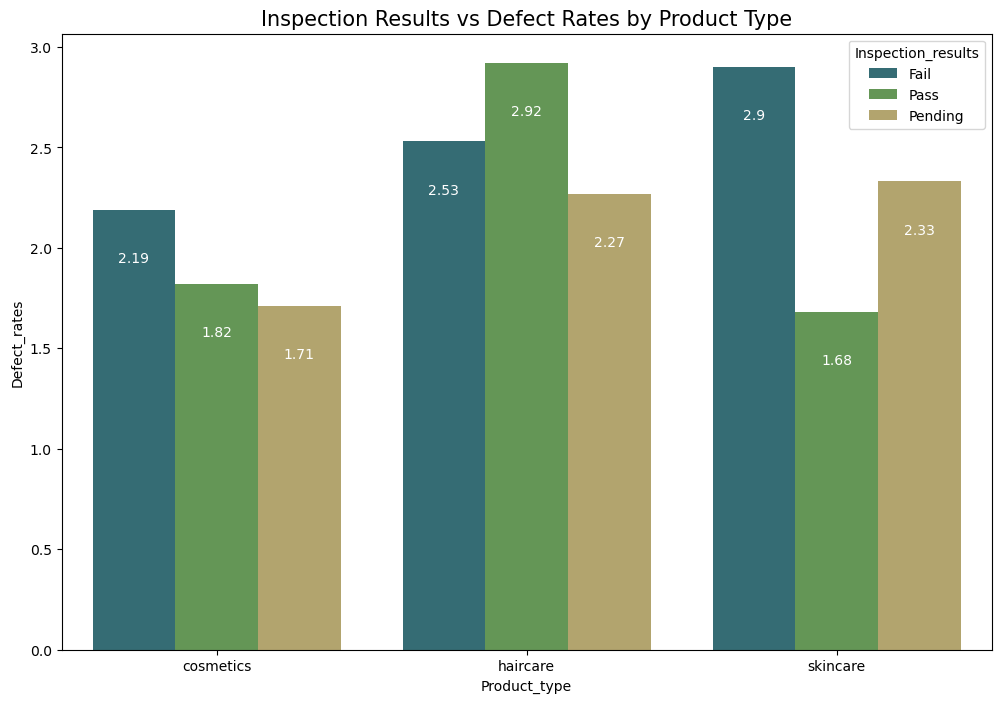

In [87]:
plt.figure(figsize=(12, 8))
p = sns.barplot(x=rate['Product_type'], y=rate['Defect_rates'], hue=rate['Inspection_results'], palette='gist_earth')

for container in p.containers:
    p.bar_label(container, padding=-40, color='white', fontsize=10)

plt.title("Inspection Results vs Defect Rates by Product Type", fontsize=15)
plt.show()


##### All product categories have a higher defect rate.

## Shipping Analysis:

1. Analyze costs, transportation modes, and routes to optimize logistics and reduce shipping costs.
2. Monitor shipping times, shipping carriers, modes of transportation to ensure timely delivery to customers.
3. Track shipping costs associated with shipping carriers and revenue generated to identify areas for cost savings

In [91]:
shipping = data.groupby(['Shipping_carriers'])['Shipping_costs'].sum().reset_index()


In [93]:
shipping

,Shipping_carriers,Shipping_costs
0,Carrier A,155.537831
1,Carrier B,236.897620
2,Carrier C,162.379457


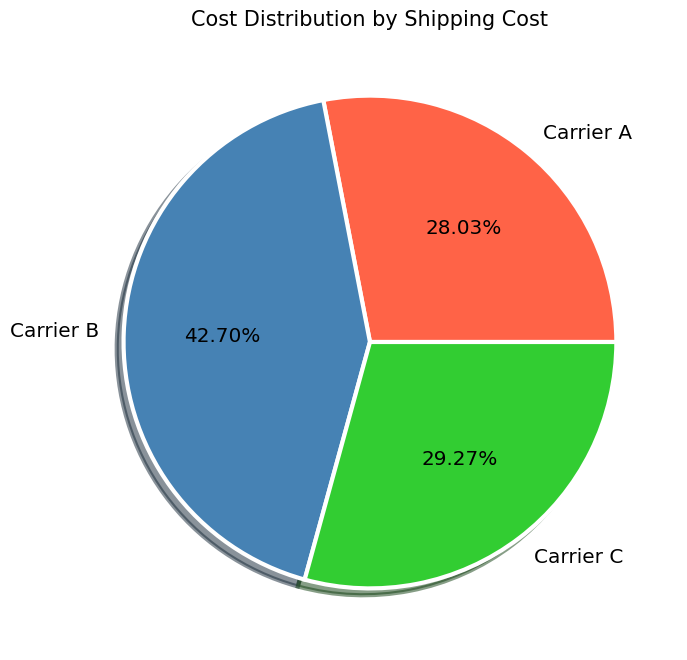

In [95]:
plt.figure(figsize=(12, 8))
colors = ['#FF6347', '#4682B4', '#32CD32']  # Tomato, SteelBlue, LimeGreen

plt.pie(shipping['Shipping_costs'], 
        labels=shipping['Shipping_carriers'], 
        autopct='%.2f%%', 
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, 
        textprops={'size': 'x-large'}, 
        shadow=True, 
        colors=colors)

plt.title('Cost Distribution by Shipping Cost', fontsize=15)
plt.show()


In [97]:
carrier_revenue = data.groupby(['Shipping_carriers'])['Revenue_generated'].sum().reset_index()
carrier_revenue['Revenue_generated'] = carrier_revenue['Revenue_generated'].round(2)


In [99]:
carrier_revenue

,Shipping_carriers,Revenue_generated
0,Carrier A,142630.04
1,Carrier B,250094.64
2,Carrier C,184880.18


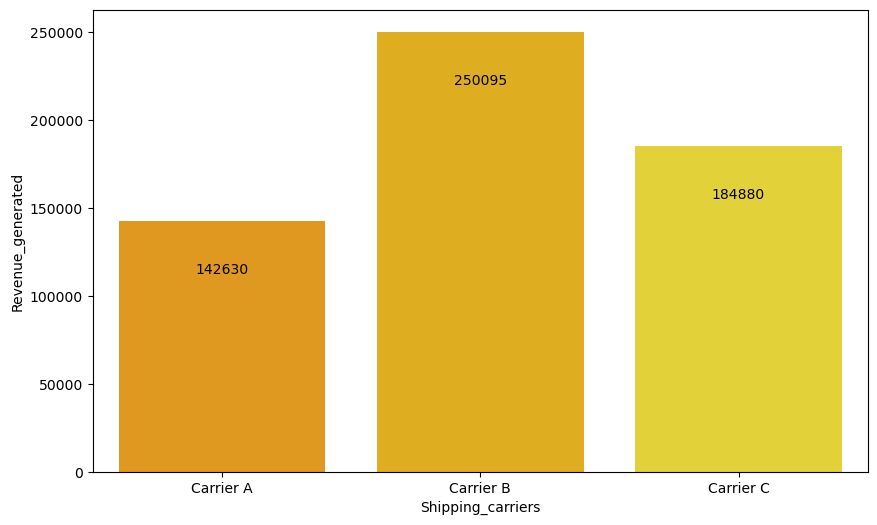

In [101]:
plt.figure(figsize=(10, 6))
p = sns.barplot(x=carrier_revenue['Shipping_carriers'], y=carrier_revenue['Revenue_generated'], palette='Wistia_r')

for container in p.containers:
    p.bar_label(container, padding=-40, color='black', fontsize=10)

plt.show()


##### Both the graphs clearly show shipping carrier B is costly as well as generating higher revenue.

In [104]:
transport = data.groupby(['Transportation_modes', 'Routes'])['Costs'].sum().reset_index()

In [106]:
transport

,Transportation_modes,Routes,Costs
0,Air,Route A,5800.887460
1,Air,Route B,4464.858025
2,Air,Route C,4338.782012
3,Rail,Route A,6790.710511
4,Rail,Route B,7007.410741
5,Rail,Route C,1370.810306
6,Road,Route A,5934.412107
7,Road,Route B,7181.085146
8,Road,Route C,2932.696385
9,Sea,Route A,2349.764416


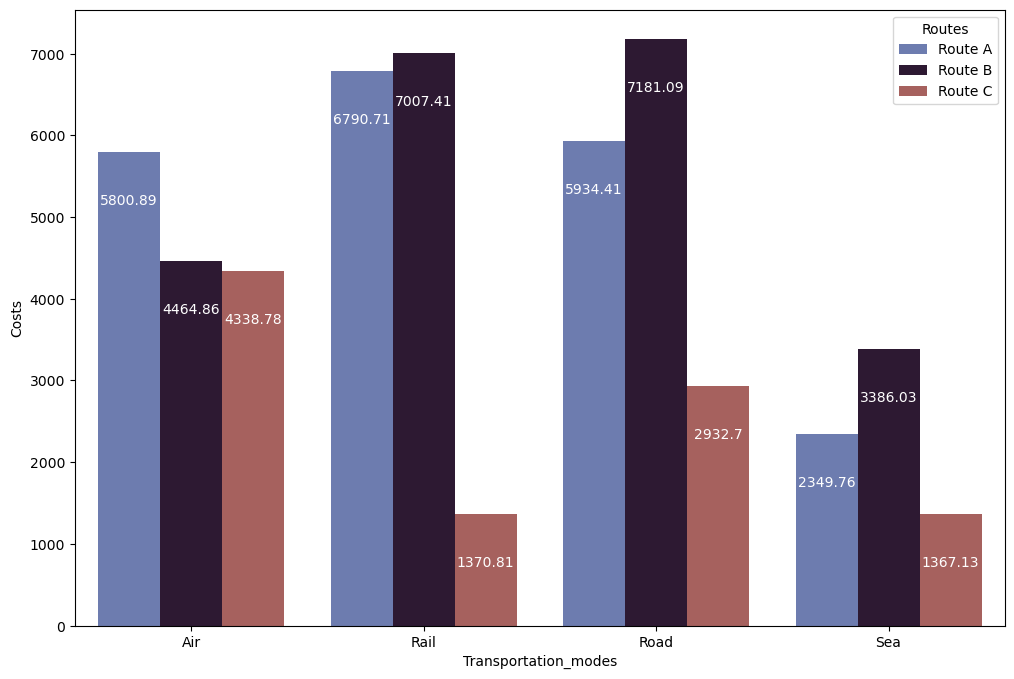

In [108]:
plt.figure(figsize=(12, 8))
p = sns.barplot(x=transport['Transportation_modes'], y=transport['Costs'], hue=transport['Routes'], palette='twilight')

for container in p.containers:
    p.bar_label(container, padding=-40, color='white', fontsize=10)

plt.show()


In [110]:
shipping = data.groupby(['Shipping_carriers', 'Transportation_modes'])['Shipping_times'].mean().reset_index()
shipping['Shipping_times'] = shipping['Shipping_times'].round(2)
shipping


,Shipping_carriers,Transportation_modes,Shipping_times
0,Carrier A,Air,5.60
1,Carrier A,Rail,7.43
2,Carrier A,Road,5.18
3,Carrier A,Sea,7.00
4,Carrier B,Air,4.21
5,Carrier B,Rail,6.33
6,Carrier B,Road,4.91
7,Carrier B,Sea,6.67
8,Carrier C,Air,6.57
9,Carrier C,Rail,6.17


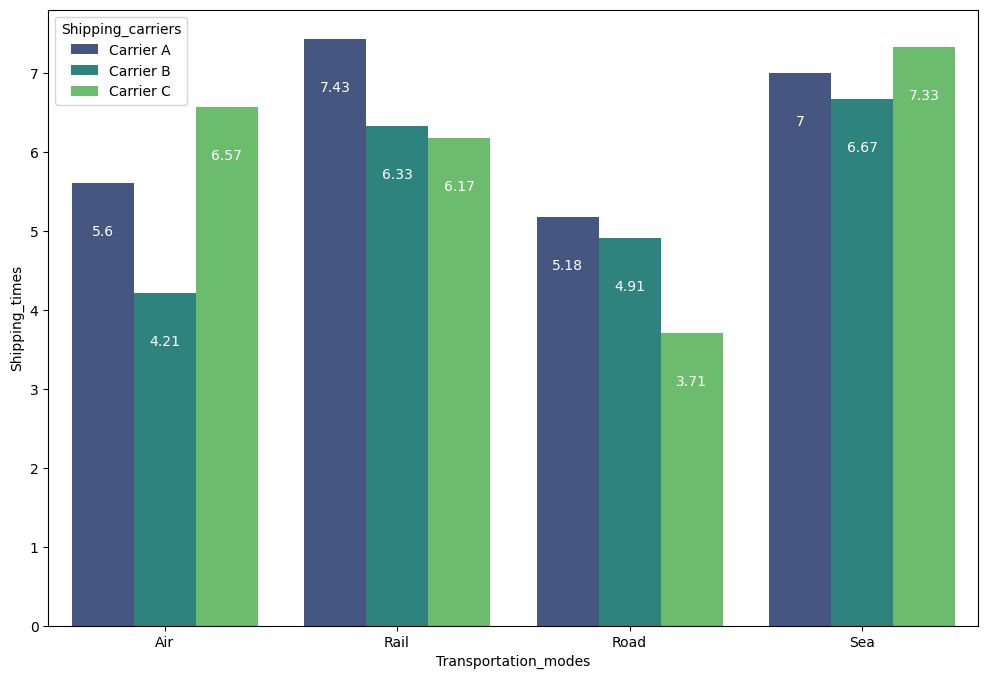

In [112]:
plt.figure(figsize=(12, 8))
p = sns.barplot(x=shipping['Transportation_modes'], y=shipping['Shipping_times'], hue=shipping['Shipping_carriers'], palette='viridis')

for container in p.containers:
    p.bar_label(container, padding=-40, color='white', fontsize=10)

plt.show()


##### According to the graph, the fastest and most efficient shipping option is Carrier B in all four transportation modes.